# Relation Word Clustering

In [1]:
import os, sys
sys.path.append(os.path.split(os.getcwd())[0])

from WordVector import WordVector

In [2]:
import data_helper
_,_,relation = data_helper.get_triplet()
relation[:5]

['cause', 'cause', 'cause', 'cause', 'cause']

In [3]:
relation = list(set(relation))
relation[:5]

['amount', 'responsible', 'appear', 'phenotype', 'neonatal']

In [4]:
wv = WordVector(relation)

Loading a pre-trained model...
Load success!


In [5]:
wv.word[:5]

['amount', 'responsible', 'appear', 'phenotype', 'neonatal']

In [6]:
wv.vector[0]

array([-1.92296147,  1.89763355,  0.97940361, -0.89634264, -1.21950316,
       -1.34482396, -1.5940367 , -0.23356958, -1.39542186, -1.79473126,
       -3.59630537, -4.03348684,  0.09122313, -6.22313261, -0.73324549,
       -0.5552994 , -1.75369513,  3.2305038 , -2.45262766,  2.43895507,
        1.58019435,  0.77244383,  0.58985466,  0.64370483, -0.99720705,
       -0.07020352, -1.54105031, -1.50047946,  2.54516578,  6.26420784,
       -1.95153832, -0.25592178, -0.43037325,  0.63343942,  0.7052474 ,
       -1.8544811 ,  5.26126146,  1.16503453,  0.22194344,  4.56730175,
       -0.80230343,  1.4301182 , -2.51490617,  5.36656713,  2.64993548,
       -0.01561764, -3.85948086, -1.34366155,  1.4754914 ,  0.6521076 ,
       -1.63709581, -3.42436266, -1.45483685,  0.15543643,  1.32830477,
        3.08852386,  0.96993488, -1.31280291, -1.18936622, -1.42719555,
        0.92583501,  1.47738361,  1.77389097, -0.87924778,  1.23161733,
        0.52522373, -0.70018589, -0.50622028, -0.07482744,  1.05

# PCA: 100dim -> 5dim

In [7]:
from DimensionReduction import DimensionReduction
dr = DimensionReduction()
vec_3d = dr.PCA(wv.vector, dim=5)
vec_3d[:3]

Explained variation per principal component: [ 0.11155301  0.07719803  0.06918814  0.0629967   0.04923863]
Average of Explained variations: 0.3701745271682739


array([[ 0.4081392 ,  4.68342543, -4.40705013,  3.65280485, -0.36543804],
       [-9.21352673, -3.56554508,  6.79495525, -7.13130188, -2.27568746],
       [-4.34440756,  1.58303106,  2.98219585,  0.59602129, -0.65778756]], dtype=float32)

# K = 5 Clustering

In [8]:
from sklearn import cluster

In [9]:
k_means = cluster.KMeans(n_clusters=5)
k_means.fit(vec_3d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
label = k_means.labels_
label[:5]

array([1, 4, 1, 0, 2], dtype=int32)

### Result

In [11]:
import pandas as pd
import numpy as np

In [12]:
df = pd.DataFrame(columns=['Relation', 'Cluster'])
df['Relation'] = relation
df['Cluster'] = label

In [13]:
df.sort_values(['Relation'], inplace=True)
df.reset_index(drop=True, inplace=True)

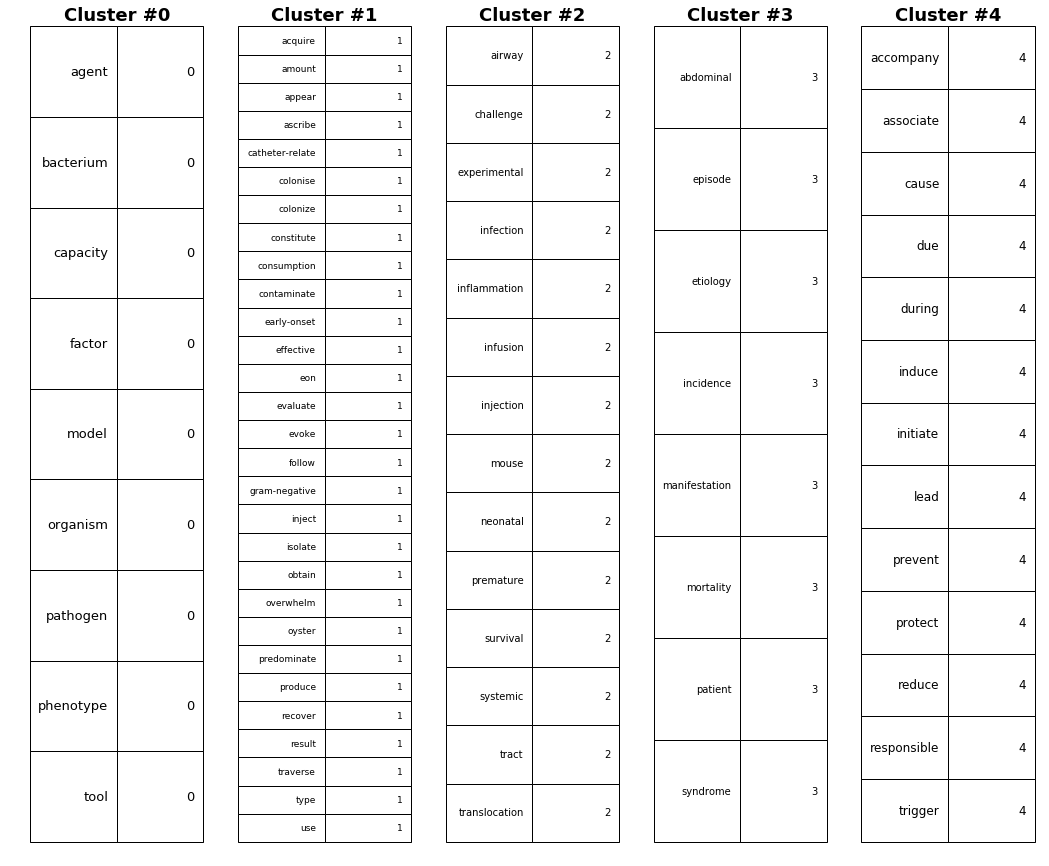

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(18,15))
bbox = [0,0,1,1]

ax1 = fig.add_subplot(151)
ax1.set_title('Cluster #0', fontsize=18, fontweight='bold')
ax1.axis('off')
ax1.table(cellText = df[df.Cluster == 0].values, bbox=bbox).set_fontsize(24)

ax2 = fig.add_subplot(152)
ax2.set_title('Cluster #1', fontsize=18, fontweight='bold')
ax2.axis('off')
ax2.table(cellText = df[df.Cluster == 1].values, bbox=bbox).set_fontsize(24)

ax3 = fig.add_subplot(153)
ax3.set_title('Cluster #2', fontsize=18, fontweight='bold')
ax3.axis('off')
ax3.table(cellText = df[df.Cluster == 2].values, bbox=bbox).set_fontsize(24)

ax4 = fig.add_subplot(154)
ax4.set_title('Cluster #3', fontsize=18, fontweight='bold')
ax4.axis('off')
ax4.table(cellText = df[df.Cluster == 3].values, bbox=bbox).set_fontsize(24)

ax5 = fig.add_subplot(155)
ax5.set_title('Cluster #4', fontsize=18, fontweight='bold')
ax5.axis('off')
ax5.table(cellText = df[df.Cluster == 4].values, bbox=bbox).set_fontsize(24)